In [55]:
# Importing the libraries
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Importing the dataset
df_dataset = pd.read_csv('Dataset.csv')
df_data_train = pd.read_csv('Data Train.csv')
X = df_dataset.iloc[:, :-1].values
y = df_dataset.iloc[:, 6].values

In [57]:
df_data_train.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Class
0,3.9,Besar,Hijau,48,81.0,3,A
1,NaN,Besar,Merah,36,63.0,3,A
2,7.7,Kecil,Merah,12,20.0,3,C
3,10.9,Besar,Biru,12,16.0,2,C
4,5.7,Kecil,Hijau,24,42.0,3,B


In [58]:
#describe numerical data
df_data_train.describe()

,Att1,Att4,Att5,Att6
count,10.000000,11.000000,10.000000,11.000000
mean,6.200000,28.363636,51.900000,2.727273
std,2.521463,13.440779,23.548767,0.467099
min,2.500000,12.000000,16.000000,2.000000
25%,4.475000,18.000000,34.500000,2.500000
50%,5.750000,24.000000,57.000000,3.000000
75%,8.075000,36.000000,71.250000,3.000000
max,10.900000,48.000000,81.000000,3.000000


In [59]:
#describe categorical data
df_data_train.describe(include=['O'])

,Att2,Att3,Class
count,11,11,11
unique,3,3,3
top,Besar,Biru,C
freq,6,4,4


In [60]:
# Find if there is null values
df_data_train.isnull().sum()

Att1     1
Att2     0
Att3     0
Att4     0
Att5     1
Att6     0
Class    0
dtype: int64

In [61]:
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(X[:, [0,4]]) 
X[:,[0,4]] = imputer.transform(X[:,[0,4]])

In [62]:
# Print X to see the results after imputing with median
X

array([[3.9, 'Besar', 'Hijau', 48, 81.0, 3],
       [5.65, 'Besar', 'Merah', 36, 63.0, 3],
       [7.7, 'Kecil', 'Merah', 12, 20.0, 3],
       [10.9, 'Besar', 'Biru', 12, 16.0, 2],
       [5.7, 'Kecil', 'Hijau', 24, 42.0, 3],
       [4.7, 'Besar', 'Hijau', 36, 62.0, 3],
       [8.2, 'Kecil', 'Biru', 24, 57.0, 2],
       [4.4, 'Sedang', 'Merah', 36, 74.0, 3],
       [8.2, 'Sedang', 'Biru', 12, 32.0, 2],
       [5.8, 'Besar', 'Biru', 24, 52.0, 3],
       [2.5, 'Besar', 'Hijau', 48, 77.0, 3],
       [2.9, 'Besar', 'Biru', 36, 91.0, 3],
       [5.6, 'Kecil', 'Merah', 24, 33.0, 3],
       [7.5, 'Kecil', 'Hijau', 24, 22.0, 2],
       [2.2, 'Sedang', 'Merah', 24, 76.0, 3],
       [4.5, 'Kecil', 'Biru', 24, 68.0, 3],
       [6.3, 'Sedang', 'Merah', 24, 32.0, 3]], dtype=object)

<Figure size 2160x2160 with 0 Axes>

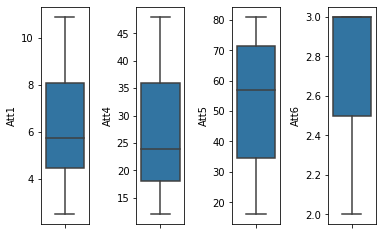

In [63]:
#Check for outliers
plt.figure(figsize=(30, 30))
f, axes = plt.subplots(1, 4)
sns.boxplot(y=df_data_train["Att1"], ax=axes[0])
sns.boxplot(y=df_data_train["Att4"], ax=axes[1])
sns.boxplot(y=df_data_train["Att5"], ax=axes[2])
sns.boxplot(y=df_data_train["Att6"], ax=axes[3])
plt.subplots_adjust(wspace=1)

In [64]:
# Get Att6 value counts
df_data_train['Att6'].value_counts()

3    8
2    3
Name: Att6, dtype: int64

In [65]:
# Plot matrix correlation
corr = df_data_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Att1,Att4,Att5,Att6
Att1,1,-0.893102,-0.925972,-0.793662
Att4,-0.893102,1,0.96233,0.590791
Att5,-0.925972,0.96233,1,0.624431
Att6,-0.793662,0.590791,0.624431,1


In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Encoding categorical data
labelEncoder_X = LabelEncoder()
categories = pd.Categorical(df_dataset['Att2'], categories=['Kecil', 'Sedang', 'Besar'], ordered=True)
labels,unique = pd.factorize(categories, sort=True)
X[:,1] = labels
X[:,2] = labelEncoder_X.fit_transform(X[:,2])

# Encoding Independent Variable
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[2])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

In [67]:
# Splitting the data train into the training set and test set    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 6/17, shuffle=False)
x_train_2 = X_train
y_train_2 = y_train

In [68]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# Splitting the data train into the training set and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=4/11,shuffle=False)

In [70]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
# Predicting the validation set results
y_val_pred = model.predict(X_val)

In [72]:
# Count accuracy
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(y_val, y_val_pred)*100,'%')

Accuracy : 75.0 %


In [73]:
# Predict test set results 
y_pred = model.predict(X_test)
print(y_pred)

['A' 'B' 'C' 'A' 'C' 'B']


In [76]:
# Count accruracy using k-fold cross validation
from sklearn.model_selection import cross_validate
cross_validate(model, x_train_2, y_train_2, cv=4)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.00409365, 0.00070786, 0.00472689, 0.0010407 ]),
 'score_time': array([0.00321031, 0.0005734 , 0.00149179, 0.00099349]),
 'test_score': array([1.        , 0.66666667, 0.66666667, 1.        ])}

In [81]:
from sklearn.model_selection import cross_val_score, cross_val_predict
accuracy = cross_val_score(model, x_train_2, y_train_2, cv=4)
print("Accuracy of model with Cross Validation : ", accuracy.mean()*100,"%")

Accuracy of model with Cross Validation :  83.33333333333333 %


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


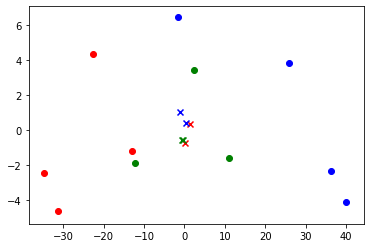

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Preparing colors for each label
colors = {
            'A': 'red',
            'B': 'green',
            'C': 'blue'
         }

# Plotting train data
visualized_train = pd.DataFrame(data=pca.fit_transform(x_train_2), columns=['x', 'y'])
train_x_axis = visualized_train['x']
train_y_axis = visualized_train['y']
train_result = y_train_2

for i in range(0, len(train_x_axis)):
    plt.scatter(train_x_axis[i], train_y_axis[i], color=colors[train_result[i]], marker='o')

# Plotting test data
visualized_test = pd.DataFrame(data=pca.fit_transform(X_test), columns=['x', 'y'])
test_x_axis = visualized_test['x']
test_y_axis = visualized_test['y']
test_result = y_pred

for i in range(0, len(test_x_axis)):
    plt.scatter(test_x_axis[i], test_y_axis[i], color=colors[test_result[i]], marker='x')